# Загрузка данных

1. Загрузить датасет по ссылке: https://www.kaggle.com/irfanasrullah/groceries .
Данные представлены в виде csv таблицы. Данные представляют собой информацию о
купленных вместе товарах
2. Создать Python скрипт. Загрузить данные в датафрейм

In [0]:
import pandas as pd

all_data = pd.read_csv('groceries - groceries.csv')
all_data  #Видно, что датафрейм содержит NaN значения

3. Переформируем данные удалив все значения NaN

In [0]:
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem,str)] for row in np_data]

4. Получим список всех уникальных товаров

In [0]:
unique_items = set()
for row in np_data:
    for elem in row:
        unique_items.add(elem)

5. Выведите список товаров, а также их количество

In [0]:
print(unique_items)
print(len(unique_items))

{'bathroom cleaner', 'make up remover', 'mayonnaise', 'rice', 'salt', 'cleaner', 'dessert', 'candles', 'organic sausage', 'other vegetables', 'canned beer', 'toilet cleaner', 'newspapers', 'waffles', 'UHT-milk', 'processed cheese', 'mustard', 'canned fish', 'photo/film', 'yogurt', 'cookware', 'pastry', 'skin care', 'sausage', 'frozen vegetables', 'pork', 'syrup', 'sweet spreads', 'tea', 'cream', 'chocolate', 'dog food', 'spices', 'sound storage medium', 'pet care', 'zwieback', 'cereals', 'seasonal products', 'canned vegetables', 'chewing gum', 'finished products', 'napkins', 'berries', 'shopping bags', 'white bread', 'cling film/bags', 'meat spreads', 'brandy', 'frozen chicken', 'hamburger meat', 'frankfurter', 'vinegar', 'nut snack', 'cake bar', 'herbs', 'dishes', 'nuts/prunes', 'light bulbs', 'salty snack', 'rum', 'canned fruit', 'honey', 'softener', 'ketchup', 'frozen dessert', 'fruit/vegetable juice', 'detergent', 'beverages', 'flour', 'hard cheese', 'frozen fish', 'rubbing alcohol

# FPGrowth и FPMax

1. Преобразуем данные к виду, удобному для анализа

In [0]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(np_data).transform(np_data)
data = pd.DataFrame(te_ary, columns=te.columns_)

2. Проведем ассоциативный анализ используя алгоритм FPGrowth при уровне поддержки 0.03

In [0]:
from mlxtend.frequent_patterns import fpgrowth

result = fpgrowth(data, min_support=0.03, use_colnames = True)
result['length'] = result['itemsets'].apply(lambda x: len(x))
result

3. Проанализируйте получившиеся варианты. Определите минимальное и максимальное
значения для уровня поддержки для набора из 1,2, и.т.д. объектов.

In [0]:
for length in set(result['length'].to_list()):
    print('[', result[result['length'] == length]['support'].min(),
          ';', result[result['length'] == length]['support'].max(), ']')

[ 0.03040162684290798 ; 0.25551601423487547 ]
[ 0.030096593797661414 ; 0.07483477376715811 ]


4. Проведите аналогичный анализ используя алгоритм FPMax

In [0]:
from mlxtend.frequent_patterns import fpmax

result = fpmax(data, min_support=0.03, use_colnames = True)
result['length'] = result['itemsets'].apply(lambda x: len(x))
result

In [0]:
for length in set(result['length'].to_list()):
    print('[', result[result['length'] == length]['support'].min(),
          ';', result[result['length'] == length]['support'].max(), ']')

[ 0.03040162684290798 ; 0.09852567361464158 ]
[ 0.030096593797661414 ; 0.07483477376715811 ]


5. Сравните полученные результаты для FPGrowth и FPMax. Объясните в чем разница работы
алгоритмов

6. Постройте гистограмму для каждого товара. Столбцы на гистограмме должны быть
упорядочены по уменьшению частоты. Отобразите результат только для 10 самых
встречаемых товаров. Как данная гистограмма коррелируют с результатами?

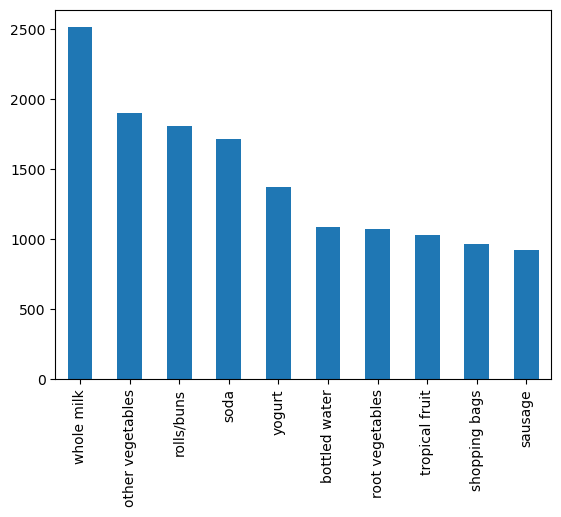

In [0]:
import matplotlib.pyplot as plt

data.sum().nlargest(10).plot.bar()
plt.show()

7. Преобразуем набор данных, чтобы он содержал ограниченный набор товаров

In [0]:
items = ['whole milk', 'yogurt', 'soda', 'tropical fruit', 'shopping bags', 'sausage',
         'whipped/sour cream', 'rolls/buns', 'other vegetables', 'root vegetables',
         'pork', 'bottled water', 'pastry', 'citrus fruit', 'canned beer', 'bottled beer']
         
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem,str) and elem in items] for row in np_data]

8. Проведите анализ FPGrowth и FPMax для нового набора данных. Проанализируйте, что
изменилось

In [0]:
te = TransactionEncoder()
te_ary = te.fit(np_data).transform(np_data)
data = pd.DataFrame(te_ary, columns=te.columns_)

In [0]:
result = fpgrowth(data, min_support=0.03, use_colnames=True)
result['length'] = result['itemsets'].apply(lambda x: len(x))
result

In [0]:
result = fpmax(data, min_support=0.03, use_colnames=True)
result['length'] = result['itemsets'].apply(lambda x: len(x))
result

9. Постройте график изменения количества получаемых правил от уровня поддержки. На
графике отдельно отобразите кривые для набора товаров 1, 2, и.т.д. Какие выводы можно
сделать по данному графику?

In [0]:
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem,str)] for row in np_data]

te = TransactionEncoder()
te_ary = te.fit(np_data).transform(np_data)
data = pd.DataFrame(te_ary, columns=te.columns_)

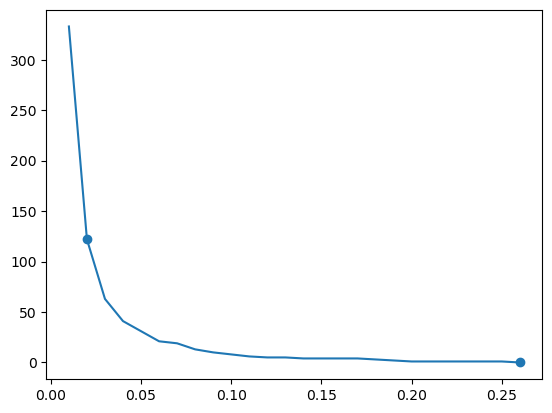

In [0]:
import numpy as np

support_range = np.arange(0.01, 1, 0.01)
count = pd.Series(dtype='float64')
border = pd.Series(dtype='float64')
k = None
for support in support_range:
    result = fpgrowth(data, min_support=support, use_colnames=True)
    count[support] = len(result)

    length = result['itemsets'].apply(lambda x: len(x))
    if k is None:
        k = length.max()
    else:
        while k > 0 and len(length[length == k] == 0):
            border[support] = len(result)
            k -= 1

    if count[support] == 0:
        border[support] = len(result)
        break

plt.scatter(border.index, border)
plt.plot(count.index, count)
plt.show()

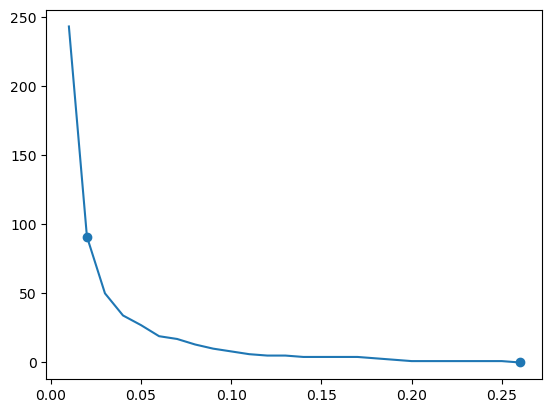

In [0]:
support_range = np.arange(0.01, 1, 0.01)
count = pd.Series(dtype='float64')
border = pd.Series(dtype='float64')
k = None
for support in support_range:
    result = fpmax(data, min_support=support, use_colnames=True)
    count[support] = len(result)

    length = result['itemsets'].apply(lambda x: len(x))
    if k is None:
        k = length.max()
    else:
        while k > 0 and len(length[length == k] == 0):
            border[support] = len(result)
            k -= 1

    if count[support] == 0:
        border[support] = len(result)
        break

plt.scatter(border.index, border)
plt.plot(count.index, count)
plt.show()

# Ассоциативные правила

1. Сформируем набор данных из определенных товаров и так, чтобы размер транзакции был 2
и более

In [0]:
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem, str) and elem in items] for row in np_data]
np_data = [row for row in np_data if len(row) > 1]

te = TransactionEncoder()
te_ary = te.fit(np_data).transform(np_data)
data = pd.DataFrame(te_ary, columns=te.columns_)

2. Получим частоты наборов используя алгоритм FPGrowth

In [0]:
result = fpgrowth(data, min_support=0.05, use_colnames=True)
result

3. Проведем ассоциативный анализ

In [0]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(result, min_threshold=0.3)
rules

Объясните, что означает каждая колонка в полученных результатах.

4. Определите, на основе какой метрики проводится расчет

5. Проведите построение ассоциативных правил для различных метрик (значение
min_threshold выберите такое, чтобы выводилось не менее 10 правил). Какой смысл несет
каждая метрика?

In [0]:
rules = association_rules(result, metric='lift', min_threshold = 1.1)

6. Рассчитайте среднее значение, медиану и СКО для каждой из метрик

In [0]:
rules.mean()

antecedent support    0.250056
consequent support    0.250056
support               0.068443
confidence            0.309774
lift                  1.240814
leverage              0.013108
conviction            1.096450
dtype: float64

7. Постройте граф для следующего анализа

In [0]:
rules = association_rules(result, min_threshold = 0.4, metric='confidence')

rules["antecedents"] = rules["antecedents"].apply(lambda x: list(x)[0]).astype("unicode")
rules["consequents"] = rules["consequents"].apply(lambda x: list(x)[0]).astype("unicode")

rules

Каждая вершина графа должна отображать набор товаров. Граф должен быть
ориентирован от антецедента к консеквенту. Ширина ребра должна отображать уровень
support, а подпись на ребре отображать confidence

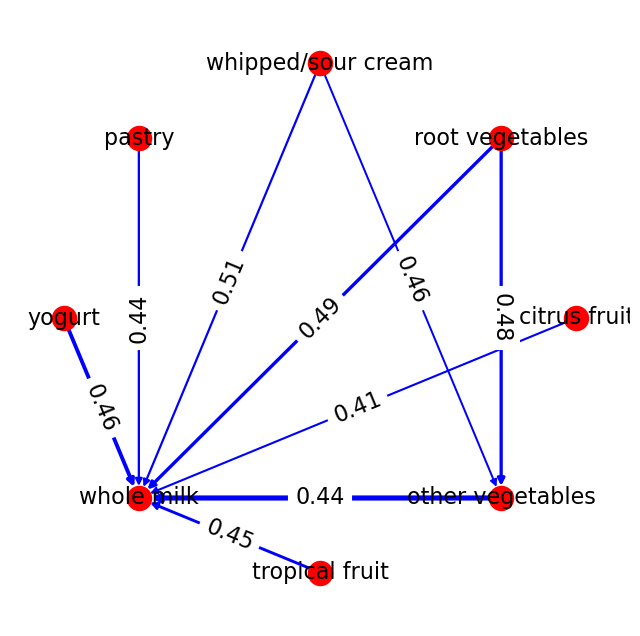

In [0]:
import networkx as nx
from matplotlib.pyplot import figure

G = nx.from_pandas_edgelist(rules, 'antecedents', 'consequents', ['confidence', 'support'], create_using=nx.DiGraph())

labels = {}
for u, v, data in G.edges(data=True):
    labels[(u, v)] = round(data['confidence'], 2)

figure(figsize=(8, 8))
pos = nx.shell_layout(G)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=16, font_color='black')
nx.draw_networkx_labels(G, pos, font_size=16, font_color='black')
nx.draw(G, pos, arrows=True, width=rules['support'] * 25, node_color='red', edge_color='blue')

9. Предложите свои способы визуализации полученных правил

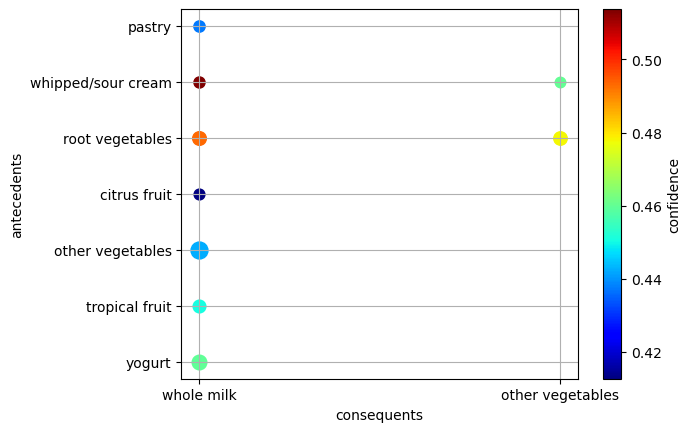

In [0]:
from matplotlib import colors
from matplotlib import cm

plt.ylabel('antecedents')
plt.xlabel('consequents')
plt.grid()

norm  = colors.Normalize(vmin=rules['confidence'].min(), vmax=rules['confidence'].max())
scalar_map = cm.ScalarMappable(norm, cmap=plt.get_cmap('jet'))
cbar = plt.colorbar(scalar_map)
cbar.ax.set_ylabel('confidence')

for _, row in rules.iterrows():
    plt.scatter(row['consequents'], row['antecedents'],
                s=row['support'] * 1000, color=scalar_map.to_rgba(row['confidence']))

plt.show()